In [17]:
import os
import torch
import torch.nn as nn
import torch.utils.data as Data
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 
import numpy as np 
from tqdm import tqdm
import talib
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [11]:
df = pd.read_csv('/Users/zed/AI_Lab/DoubleEnsembleML/Data/BTC.csv')

In [15]:
df

,Date,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,2014-01-07,874.67040,892.06753,810.00000,810.00000,15.622378,1.315147e+04,841.835522
1,2014-01-08,810.00000,899.84281,788.00000,824.98287,19.182756,1.609733e+04,839.156269
2,2014-01-09,825.56345,870.00000,807.42084,841.86934,8.158335,6.784250e+03,831.572913
3,2014-01-10,839.99000,857.34056,817.00000,857.33056,8.024510,6.780220e+03,844.938794
4,2014-01-11,858.20000,918.05471,857.16554,899.84105,18.748285,1.669857e+04,890.671709
...,...,...,...,...,...,...,...,...
2652,2021-04-21,56500.00000,56805.50000,53600.00000,53815.20000,4788.013532,2.645352e+08,55249.477244
2653,2021-04-22,53815.30000,55459.40000,50500.00000,51730.00000,10144.204074,5.396125e+08,53194.167081
2654,2021-04-23,51709.30000,52124.40000,47549.30000,51178.70000,11159.243380,5.545896e+08,49697.773594
2655,2021-04-24,51178.60000,51200.00000,48746.40000,50093.40000,4039.459093,2.021033e+08,50032.268888


In [13]:
df.describe()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
count,2657.000000,2657.000000,2657.000000,2657.000000,2657.000000,2.657000e+03,2657.000000
mean,6248.907637,6441.946946,6032.329906,6262.013264,3730.080284,3.813847e+07,6244.193200
std,10069.957080,10392.953739,9683.304888,10090.570359,4330.005079,7.691040e+07,10059.290061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,468.762850,490.000000,455.000000,467.850000,78.944606,2.683211e+04,470.940140
50%,3430.520000,3494.100000,3350.000000,3431.000000,2668.972984,1.301044e+07,3422.986539
75%,8532.700000,8780.000000,8201.800000,8536.700000,5567.970655,4.310796e+07,8519.950856
max,63581.000000,64900.000000,62050.000000,63587.200000,45110.873425,9.149137e+08,63326.470550


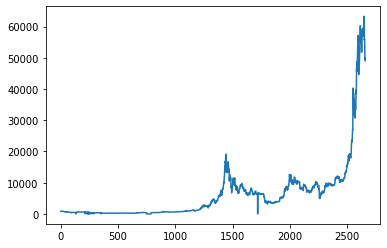

In [18]:
plt.plot(df["Weighted Price"])